In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

import warnings
warnings.filterwarnings('ignore')

c:\myprograms\anaconda332\envs\nlp_sentence\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
train_df = pd.read_csv("input.csv")

train_df.drop(columns=['Unnamed: 0'])

# yes = pd.read_csv("yes.csv")
# yes = yes["sequence"].to_list()

# no = pd.read_csv("no.csv")
# no = no["sequence"].to_list()

# neither = pd.read_csv("neither.csv")
# neither = neither["sequence"].to_list()

,patient_id,sequence,label
0,Z8399761,"(unclear history), venous insufficiency, PVD, ...",3
1,Z11957588,period. It apparently cuts car accident rates ...,1
2,Z10809276,(P) 5 Hearing: no concerns Vision: needs updat...,2
3,Z8539944,"remission, s/p 1 suicide attempt, 3 IPLOC admi...",3
4,Z12696803,should be pursued at that point in time. He an...,1
5,Z7552077,since the hospital visit. The patient is accom...,2
6,Z11702635,71 y.o. female with has a past medical history...,3
7,Z15548862,in the Memory Diagnostic Clinic at McLean Hosp...,3
8,Z7648831,on back wound with significant output per RN. ...,3
9,Z7701777,lobes bilaterally and left parietal lobe. Thes...,3


In [26]:
test_df = pd.read_csv("input_test.csv")

test_df.drop(columns=['Unnamed: 0'])

,patient_id,sequence,label
0,Z7766129,(akathisia) diphenhydramine (urinary retention...,2
1,Z12274682,is notable for maternal grandmother with epile...,1
2,Z10490939,Bundle branch block Cataract Nonexudative age-...,3


In [14]:
# train_yes = yes[:int(0.85 * len(yes))]
# test_yes = yes[int(0.85 * len(yes)):]

# train_no = no[:int(0.85 * len(no))]
# test_no = no[int(0.85 * len(no)):]

# train_neither = neither[:int(0.85 * len(neither))]
# test_neither = neither[int(0.85 * len(neither)):]

# train_x = train_yes + train_no + train_neither
# test_x = test_yes + test_no + test_neither

# train_y = np.append(np.ones((len(train_yes), 1)), np.zeros((len(train_neg), 1)), axis=0)
# test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [23]:
# Create a transformation pipeline
# The pipeline sequentially applies a list of transforms and as a final estimator logistic regression 
pipeline_log = Pipeline([
                ('count', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(solver='liblinear', multi_class='auto')),
        ])

# Train model using the created sklearn pipeline
model_name = 'logistic regression classifier'
model_lgr = pipeline_log.fit(train_df['sequence'], train_df['label'])

In [40]:
def evaluate_results(model, test_df):
    # Predict class labels using the learner function
    test_df['pred'] = model_lgr.predict(test_df['sequence'])
    y_true = test_df['label']
    y_pred = test_df['pred']
    target_names = ['negative', 'neither', 'positive']

    # Print the Confusion Matrix
    results_log = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
    results_df_log = pd.DataFrame(results_log).transpose()
    print(results_df_log)
    matrix = confusion_matrix(y_true,  y_pred)
    sns.heatmap(pd.DataFrame(matrix), 
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.xlabel('Predictions')
    plt.xlabel('Actual')

    model_score = score(y_pred, y_true, average='macro')
    return model_score

              precision    recall  f1-score   support
negative       0.000000  0.000000  0.000000  1.000000
neither        0.000000  0.000000  0.000000  1.000000
positive       0.333333  1.000000  0.500000  1.000000
accuracy       0.333333  0.333333  0.333333  0.333333
macro avg      0.111111  0.333333  0.166667  3.000000
weighted avg   0.111111  0.333333  0.166667  3.000000


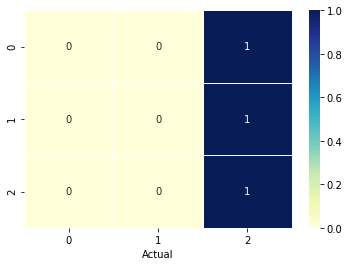

In [47]:
# Evaluate model performance
model_score = evaluate_results(model_lgr, test_df)
performance_df = pd.DataFrame().append({'model_name': model_name, 
                                    'f1_score': model_score[0], 
                                    'precision': model_score[1], 
                                    'recall': model_score[2]}, ignore_index=True) 

In [43]:
prediction_sequences = ['PHQ-2 Score: 0 Cognition Negative: no evidence of cognitive decline noted by patient or family; no memory problems causing dysfunction in daily activities Falls risk Time to rise from, walk 10 feet,', 
                       'depression, but certainly does not appear depressed on exam - Dementia: MMSE on 5/21/16 23/30 c/w Mild cognitive impairment, which is NOT c/w profound weight loss - Gastroparesis: Hx of diabetes']
for seq in prediction_sequences:
    ans = model_lgr.predict([seq])
    d = {1: 'Negative', 2: 'Neither', 3: 'Positive'}
    print(seq + '-> ' + d[ans[0]], "\n")

PHQ-2 Score: 0 Cognition Negative: no evidence of cognitive decline noted by patient or family; no memory problems causing dysfunction in daily activities Falls risk Time to rise from, walk 10 feet,-> Positive 

depression, but certainly does not appear depressed on exam - Dementia: MMSE on 5/21/16 23/30 c/w Mild cognitive impairment, which is NOT c/w profound weight loss - Gastroparesis: Hx of diabetes-> Positive 

